<a href="https://colab.research.google.com/github/nandiniranjansinha/Prasunet_DS_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/bank.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features (X) and target (y)
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7813, 16), (3349, 16), (7813,), (3349,))

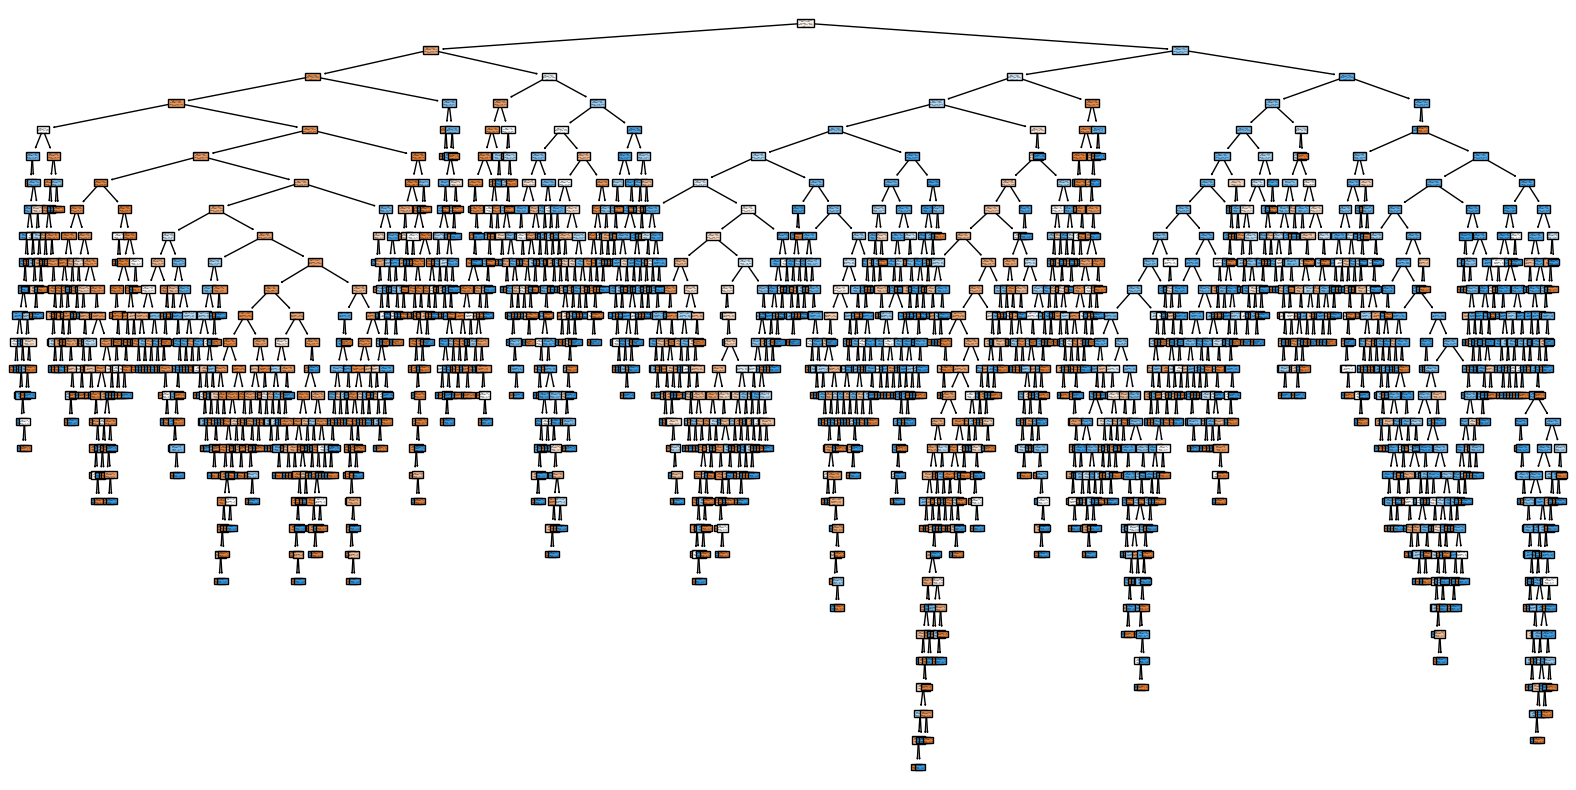

(0.782024484920872,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79      1742\n           1       0.78      0.76      0.77      1607\n\n    accuracy                           0.78      3349\n   macro avg       0.78      0.78      0.78      3349\nweighted avg       0.78      0.78      0.78      3349\n')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['deposit'].classes_, filled=True)
plt.show()

accuracy, report


In [5]:
# Print the accuracy
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(report)


Accuracy: 0.782024484920872
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1742
           1       0.78      0.76      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



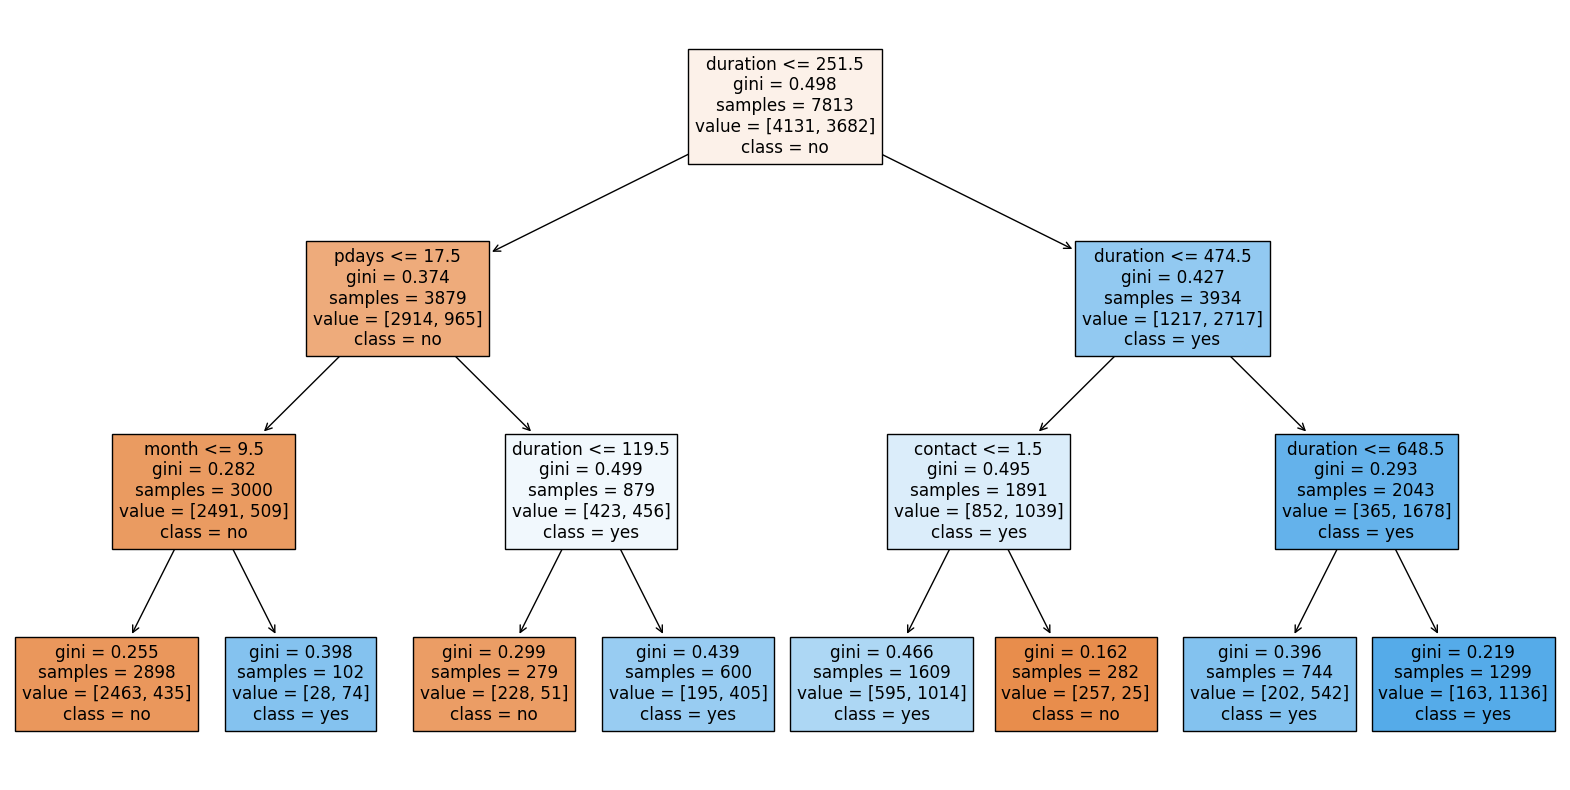

In [6]:
# Limit the depth of the tree for visualization
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['deposit'].classes_, filled=True)
plt.show()


In [7]:
# Print the accuracy and classification report
accuracy, report


(0.782024484920872,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79      1742\n           1       0.78      0.76      0.77      1607\n\n    accuracy                           0.78      3349\n   macro avg       0.78      0.78      0.78      3349\nweighted avg       0.78      0.78      0.78      3349\n')